# **Part 1: Data Processing**#

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm


In [ ]:
#import Eastville data
data = pd.read_csv('eastville.csv')

#Gain baseline knowledge of the dataset and the different data types
print(data.head())
print(data.info ())
#Check for missing values in each column of data
data.isnull().sum()

   house  sqft  beds  baths  heat     style  garage  basement  age  fire  \
0      1  1610     3      2     0  Cape Cod       1         1   12     1   
1      2  2151     3      2     1  Cape Cod       2         0   13     1   
2      3  1718     4      2     0  Cape Cod       2         1   17     0   
3      4  1534     3      2     0  Cape Cod       2         1   11     1   
4      5  1527     3      2     0  Cape Cod       1         0    6     1   

    price        school  
0  234280  Apple Valley  
1  246360    Plum Ridge  
2  265650    Plum Ridge  
3  237420    Plum Ridge  
4  259170    Plum Ridge  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   house     108 non-null    int64 
 1   sqft      108 non-null    int64 
 2   beds      108 non-null    int64 
 3   baths     108 non-null    int64 
 4   heat      108 non-null    int64 
 5   style     1

,0
house,0
sqft,0
beds,0
baths,0
heat,0
style,0
garage,0
basement,0
age,0
fire,0


Missing Values: There are no missing values in the Eastville data set.

Data Types: With the expection of school and style, all of the other columns are integer data types. The two exceptions are objects.

# **Part 2: Descriptive Analytics**#

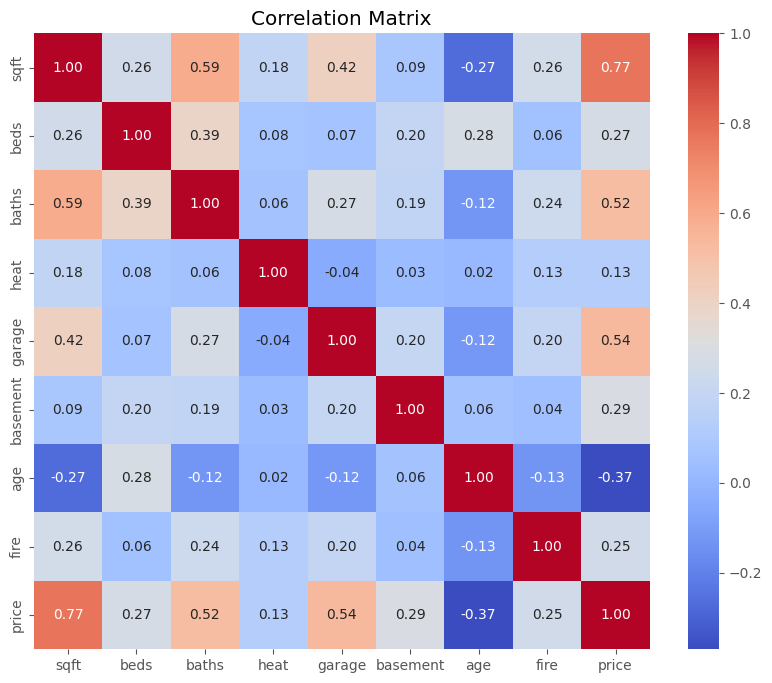

In [ ]:
# # Separate quantitative and qualitative variables
quant_vars = data.select_dtypes(include=['int64', 'float64']).drop(columns=['house'])
qual_vars = data.select_dtypes(exclude=['int64', 'float64'])

# Compute correlation matrix, and select only quantitative variables
corr_matrix = quant_vars.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Quantitative Variables

# Descriptive statistics
quant_stats = quant_vars.describe().T
print("Descriptive Stats for Quantitative Variables:\n")
print(quant_stats)

Descriptive Stats for Quantitative Variables:

          count           mean           std       min        25%       50%  \
sqft      108.0    1994.481481    443.710975     861.0    1649.25    2034.5   
beds      108.0       3.601852      0.682763       3.0       3.00       3.5   
baths     108.0       2.648148      0.552223       2.0       2.00       3.0   
heat      108.0       0.138889      0.347443       0.0       0.00       0.0   
garage    108.0       2.037037      0.332814       1.0       2.00       2.0   
basement  108.0       0.842593      0.365882       0.0       1.00       1.0   
age       108.0      11.231481      4.655630       1.0       8.00      11.0   
fire      108.0       0.805556      0.397618       0.0       1.00       1.0   
price     108.0  341394.629630  82092.910396  197300.0  285017.50  331715.0   

                75%       max  
sqft        2304.75    3222.0  
beds           4.00       6.0  
baths          3.00       4.0  
heat           0.00       1.0  
ga

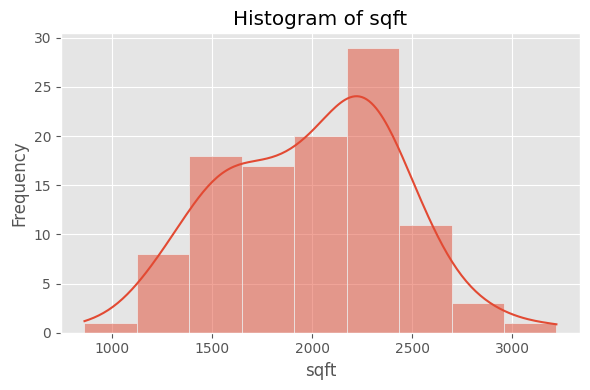

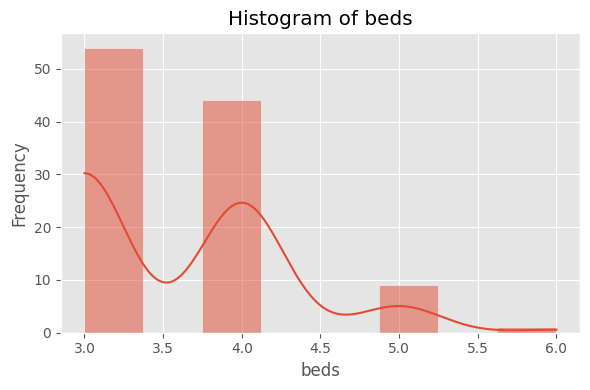

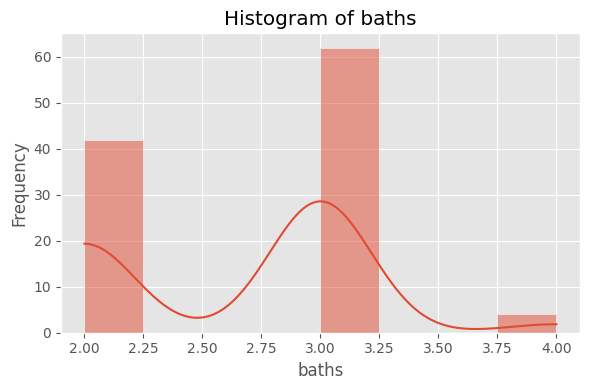

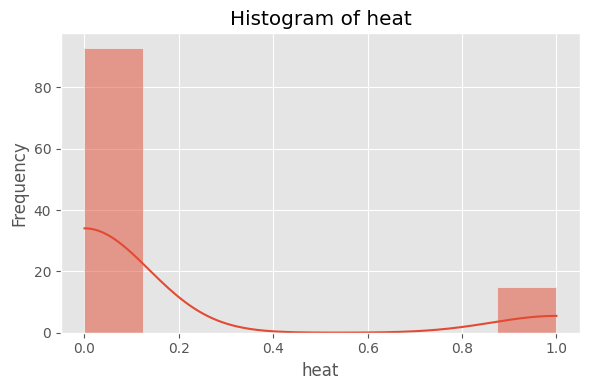

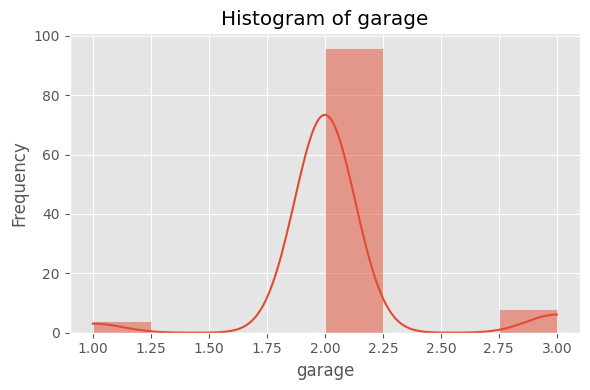

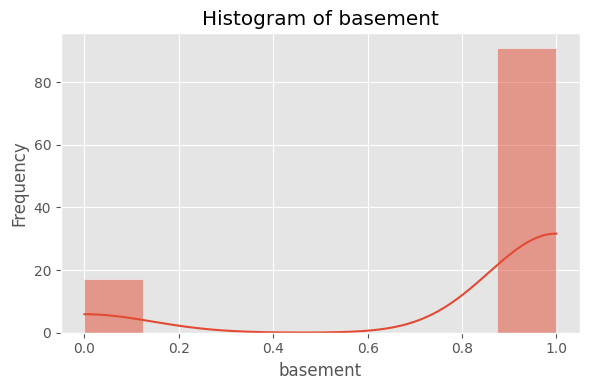

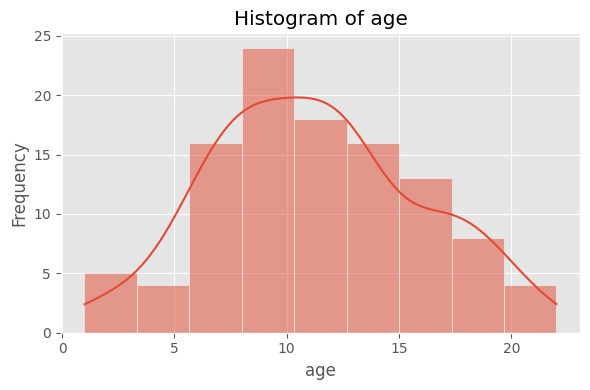

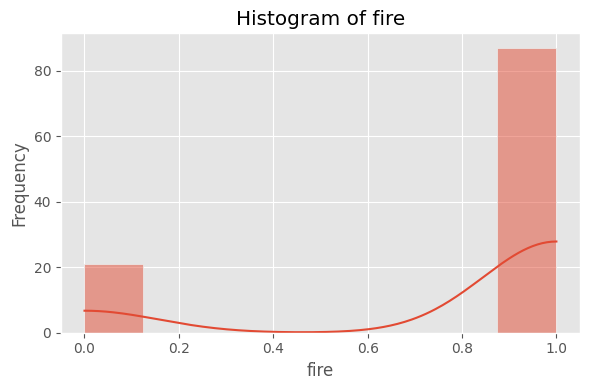

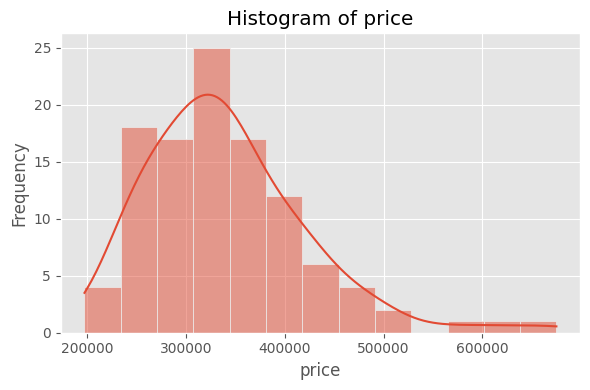

In [ ]:
for col in quant_vars.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


Frequency Tables and Descriptive Stats for Qualitative Variables:


--- style ---
Frequency Table:
style
Ranch        44
Cape Cod     39
Two-story    25
Name: count, dtype: int64

Descriptive Stats:
count       108
unique        3
top       Ranch
freq         44
Name: style, dtype: object

--- school ---
Frequency Table:
school
Apple Valley    65
Plum Ridge      43
Name: count, dtype: int64

Descriptive Stats:
count              108
unique               2
top       Apple Valley
freq                65
Name: school, dtype: object


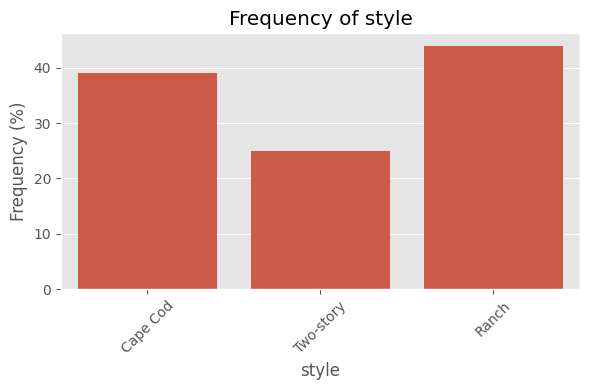

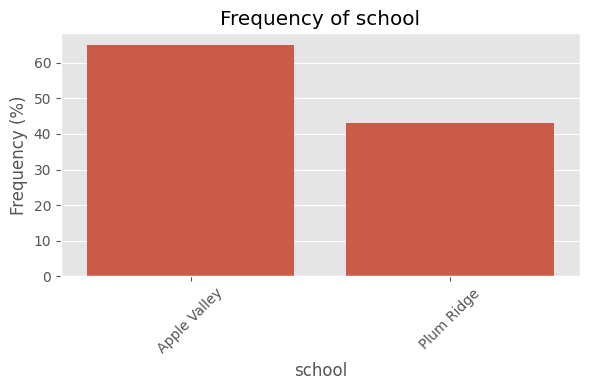

In [ ]:
print("\nFrequency Tables and Descriptive Stats for Qualitative Variables:\n")

for col in qual_vars.columns:
    print(f"\n--- {col} ---")
    print("Frequency Table:")
    print(data[col].value_counts())
    print("\nDescriptive Stats:")
    print(data[col].describe())

# Plot bar charts for each qualitative variable
for col in qual_vars.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **Part 3: Develop Multiple Regression Model**#

1.   List item
2.   List item



In [ ]:
# Drop identifier column if it's not useful for modeling
data_1 = data.drop(columns=['house'])

# Create dummy variables for categorical columns
data_dummies = pd.get_dummies(data_1, drop_first=True)

# Display the transformed dataset
print(data_dummies.head())

   sqft  beds  baths  heat  garage  basement  age  fire   price  style_Ranch  \
0  1610     3      2     0       1         1   12     1  234280        False   
1  2151     3      2     1       2         0   13     1  246360        False   
2  1718     4      2     0       2         1   17     0  265650        False   
3  1534     3      2     0       2         1   11     1  237420        False   
4  1527     3      2     0       1         0    6     1  259170        False   

   style_Two-story  school_Plum Ridge  
0            False              False  
1            False               True  
2            False               True  
3            False               True  
4            False               True  


In [ ]:
# Convert all boolean columns to int
for col in data_dummies.columns:
    if data_dummies[col].dtype == bool:
        data_dummies[col] = data_dummies[col].astype(int)

In [ ]:
y = data_dummies['price']
x = data_dummies.drop(columns=['price'])
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     32.30
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.70e-27
Time:                        03:33:53   Log-Likelihood:                -1291.2
No. Observations:                 108   AIC:                             2606.
Df Residuals:                      96   BIC:                             2639.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.174e+04   3.36e+0

**Eliminating non-significant variables to create a better regression**

In [ ]:
  # Step 3. Build the Multiple Regression Step by Step
significance_level = 0.05

# start the process with all variables
x = data_dummies.drop(columns=['price'])  # drop the target variable

# Add a constant to the model (statsmodels doesn't do this by default)
X = sm.add_constant(x)

# keep track of the dummy variable group for style
dummy_group_style = []
for var in X.columns:
    if var.startswith('style'):
        dummy_group_style.append(var)
print(dummy_group_style)

# keep track of the dummy variable group for school
dummy_group_school = []
for var in X.columns:
    if var.startswith('school'):
        dummy_group_school.append(var)
print(dummy_group_school)

# Step 3: backwards elimination process
while True:
    # Step 3.1 fit the model
    model = sm.OLS(y, X).fit()

    # get the max pvalues and corresponding variable
    pvalues = model.pvalues.round(3)[1:]
    max_pvalue = pvalues.max()
    worst_var = pvalues.idxmax()

    # Step 3.2: check the highest p-value column against the significance level
    if max_pvalue > significance_level:
        # check if the var is part of dummy group
        if (worst_var in dummy_group_style) or (worst_var in dummy_group_school):
            # evaluate whether the whole group is significant
            if worst_var in dummy_group_style:
                X_restricted = X.drop(columns=dummy_group_style)
                model_restricted = sm.OLS(y, X_restricted).fit()

                f_test = model.compare_f_test(model_restricted)
                sig_f = f_test[1]

                # should we keep it or not
                if sig_f > significance_level:
                    # remove the whole group
                    X = X_restricted
                    print(f"the dummy group {dummy_group_style} is removed, with sig F {sig_f:.3f}")
                    # Added break statement for this condition: entire style group removed
                    break
                else:
                    # keep the whole group and exit loop
                    print(f"the dummy group {dummy_group_style} is kept")
                    # Added break statement for this condition: style group significant
                    break

            else:  # Check for school dummy group
                X_restricted = X.drop(columns=dummy_group_school)
                model_restricted = sm.OLS(y, X_restricted).fit()

                f_test = model.compare_f_test(model_restricted)
                sig_f = f_test[1]

                # should we keep it or not
                if sig_f > significance_level:
                    # remove the whole group
                    X = X_restricted
                    print(f"the dummy group {dummy_group_school} is removed, with sig F {sig_f:.3f}")
                    # Added break statement for this condition: entire school group removed
                    break
                else:
                    # keep the whole group and exit loop
                    print(f"the dummy group {dummy_group_school} is kept")
                    # Added break statement for this condition: school group significant
                    break

        else:
            # remove the worst predictor
            X = X.drop(columns=worst_var)
            print(f"variable {worst_var} is removed")
    else:
        print(f"Process Complete")
        break

    # Step 3.3: Fit the model again (This line is probably redundant now due to break statements)

print(model.summary())

['style_Ranch', 'style_Two-story']
['school_Plum Ridge']
variable baths is removed
variable heat is removed
variable fire is removed
the dummy group ['style_Ranch', 'style_Two-story'] is kept
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     45.44
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           8.14e-30
Time:                        03:33:55   Log-Likelihood:                -1291.6
No. Observations:                 108   AIC:                             2601.
Df Residuals:                      99   BIC:                             2625.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  

# **Part 4: Make prediction and comment on the quality of the prediction**#

The model explains about 78.60% of variation in price
On average, our prediction is off from actual price by $39485.30


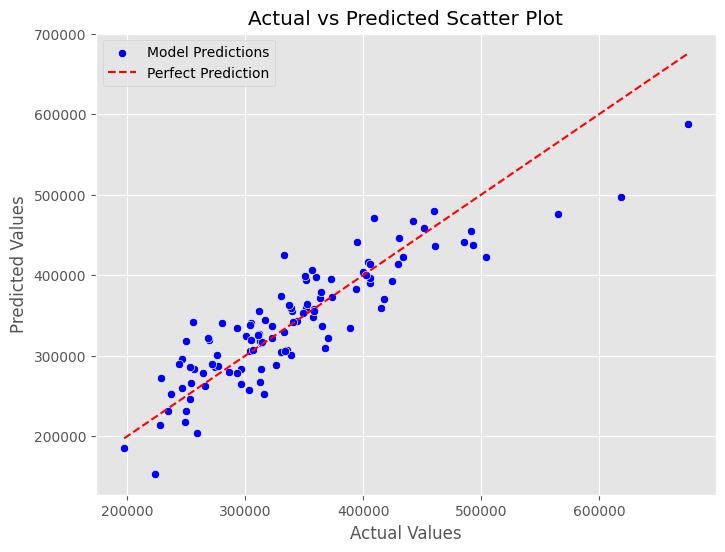

In [ ]:
# Get model prediction
y_pred = model.predict(X)
data["y_pred"] = y_pred

# Plot the data
plt.figure(figsize=(8,6))
sns.scatterplot(x=data["price"], y=data["y_pred"],color='blue', label='Model Predictions') # made the prediction color blue for better visibility!
plt.plot([data["price"].min(), data["price"].max()], [data["price"].min(), data["price"].max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values'); plt.ylabel('Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Scatter Plot')

# Evaluate relative model fit with R2
r2 = model.rsquared
print(f"The model explains about {r2:.2%} of variation in {y.name}")

# Evaluate prediction accuracy with RMSE = SQRT(MSE)
rmse = model.mse_resid ** 0.5
print(f"On average, our prediction is off from actual price by ${rmse:.2f}")